In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(18,8)})

100,056 wpisów  

Complexity <- głosy użytkowników, mało konkretne - wargames ze score ~3 jest podobna do gier z innych kategorii ze score ~4.5  

Wiedza dziedzinowa:
* liczba graczy
* designer

In [3]:
games_df = pd.read_json('~/recommend.games/data/bgg_GameItem.jl', lines = True)

In [75]:
games_df.columns

Index(['add_rank', 'alt_name', 'artist', 'avg_rating', 'bayes_rating',
       'best_rating', 'bgg_id', 'category', 'compilation', 'complexity',
       'cooperative', 'description', 'designer', 'easiest_complexity',
       'family', 'game_type', 'hardest_complexity',
       'highest_language_dependency', 'image_file', 'image_url',
       'language_dependency', 'lowest_language_dependency', 'max_players',
       'max_players_best', 'max_players_rec', 'max_time', 'mechanic',
       'min_age', 'min_age_rec', 'min_players', 'min_players_best',
       'min_players_rec', 'min_time', 'name', 'num_votes', 'publisher', 'rank',
       'stddev_rating', 'url', 'video_url', 'worst_rating', 'year',
       'implementation', 'expansion', 'integration', 'compilation_of'],
      dtype='object')

In [76]:
games_df[['name', 'category', 'mechanic', 'year', 'avg_rating', 'num_votes', 'complexity']].head(100)

,name,category,mechanic,year,avg_rating,num_votes,complexity
0,Die Macher,"[Economic:1021, Negotiation:1026, Political:1001]","[Alliances:2916, Area Majority / Influence:208...",1986.0,7.62694,5225.0,4.3245
1,Dragonmaster,"[Card Game:1002, Fantasy:1010]",[Trick-taking:2009],1981.0,6.63055,553.0,1.9630
2,Samurai,"[Abstract Strategy:1009, Medieval:1035]","[Area Majority / Influence:2080, Hand Manageme...",1998.0,7.45016,14768.0,2.4885
3,Tal der Könige,[Ancient:1050],"[Action Points:2001, Area Majority / Influence...",1992.0,6.59888,339.0,2.6667
4,Acquire,"[Economic:1021, Territory Building:1086]","[Hand Management:2040, Investment:2910, Market...",1964.0,7.33927,18216.0,2.5041
...,...,...,...,...,...,...,...
95,Extrablatt,[Territory Building:1086],"[Area Majority / Influence:2080, Set Collectio...",1991.0,7.01340,256.0,2.9000
96,Colossal Arena,"[Card Game:1002, Fantasy:1010, Mythology:1082]","[Betting and Bluffing:2014, Hand Management:2040]",1997.0,6.77071,6971.0,2.0205
97,Mystery Rummy: Jack the Ripper,"[Card Game:1002, Murder/Mystery:1040]","[Hand Management:2040, Set Collection:2004, Vo...",1998.0,6.94270,3317.0,1.7466
98,Peaceful Resistance,[Abstract Strategy:1009],"[Grid Movement:2676, Hexagon Grid:2026, Tile P...",1995.0,5.49474,19.0,NaN


In [77]:
sorted_games_df = games_df.sort_values(by='num_votes', ascending=False).reset_index(drop=True)

In [78]:
indices = np.unique(np.geomspace(start=1, stop=sorted_games_df['name'].size, num=2000, dtype=int))-1

In [79]:
df = sorted_games_df[:500]

<AxesSubplot:ylabel='num_votes'>

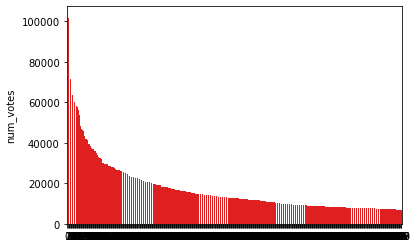

In [80]:
sns.barplot(data=df, x=df.index, y='num_votes', color="red")

374,577 wpisów

In [60]:
users_df = pd.read_json('~/recommend.games/data/bgg_UserItem.jl', lines = True)

In [8]:
users_df.columns

Index(['bgg_user_name', 'country', 'first_name', 'item_id', 'last_login',
       'last_name', 'region', 'registered', 'updated_at', 'external_link',
       'image_file', 'image_url'],
      dtype='object')

In [14]:
users_df[['bgg_user_name', 'country', 'region']].head(100)

,bgg_user_name,country,region
0,beastvol,United States,California
1,fu_koios,United States,Ohio
2,mycroft,United States,New Mexico
3,woh,Belgium,NaN
4,(mostly) harmless,Austria,NaN
5,- v -,NaN,NaN
6,-=yod@=-,Spain,NaN
7,-de-,Poland,NaN
8,-grizzly-,Czech Republic,Unspecified
9,-johnny-,Canada,Quebec


<AxesSubplot:>

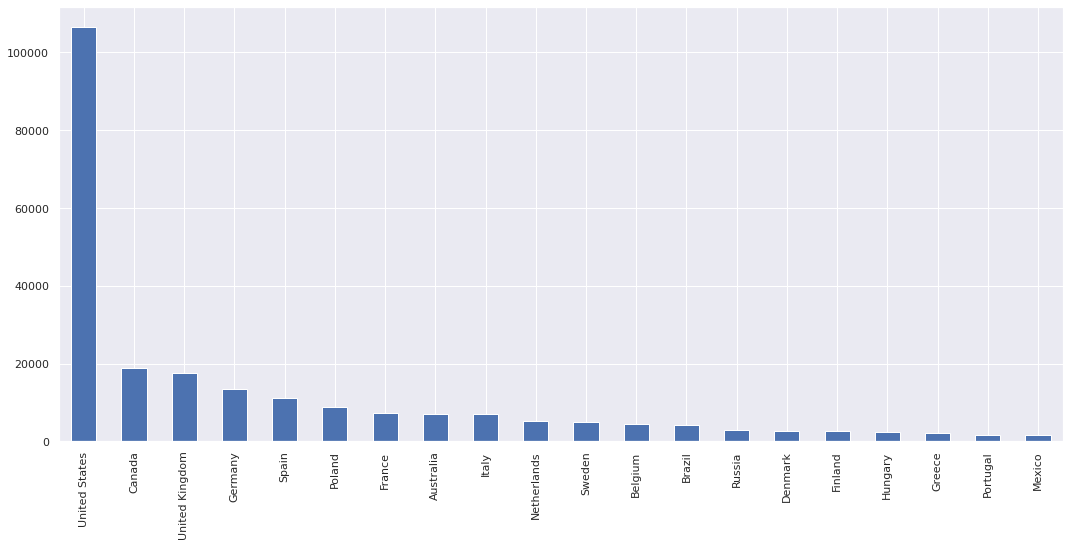

In [62]:
users_df['country'].value_counts()[:20].plot(kind='bar')

40,200,532 wpisów

In [4]:
ratings_df = pd.read_json('~/recommend.games/data/bgg_RatingItem.jl', lines = True, nrows = 10)

In [5]:
ratings_df.columns

Index(['bgg_id', 'bgg_user_for_trade', 'bgg_user_name', 'bgg_user_owned',
       'bgg_user_play_count', 'bgg_user_preordered', 'bgg_user_prev_owned',
       'bgg_user_rating', 'bgg_user_want_in_trade', 'bgg_user_want_to_buy',
       'bgg_user_want_to_play', 'item_id', 'updated_at'],
      dtype='object')

In [9]:
batch_size = 1000000
n_iter = 0
slim_ratings_df = pd.DataFrame()
with open('/home/adis/recommend.games/data/bgg_RatingItem.jl') as f:
    batch = pd.read_json(f, lines=True, nrows=batch_size)
    while(not batch.empty):
        print(n_iter)
        slim_ratings_df = slim_ratings_df.append(batch[['bgg_id', 'bgg_user_name', 'bgg_user_rating']])
        batch = pd.read_json(f, lines=True, nrows=batch_size)
        n_iter += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [15]:
slim_ratings_df.dropna(how='any', inplace=True)

In [18]:
slim_ratings_df.to_csv('/home/adis/Uni/BG/ratings.csv.gz', compression='gzip')

In [8]:
ratings_df[['bgg_user_owned', 'bgg_user_rating', 'bgg_user_play_count', 'bgg_user_want_to_play']]

,bgg_user_owned,bgg_user_rating,bgg_user_play_count,bgg_user_want_to_play
0,True,8.0,0,False
1,True,7.0,0,False
2,True,7.0,0,False
3,True,6.0,0,False
4,True,9.0,0,False
5,True,8.0,0,False
6,True,7.0,0,False
7,True,5.0,0,False
8,True,9.0,0,False
9,False,NaN,0,False


In [9]:
ratings_df.value_counts('bgg_user_owned')

bgg_user_owned
True     9
False    1
dtype: int64

In [3]:
batch_size = 100000
n_iter = 0
with open('/home/adis/recommend.games/data/bgg_RatingItem.jl') as f:
    ratings = pd.Series(dtype='int64')
    owned_games = pd.Series(dtype='int64')
    play_counts = pd.Series(dtype='int64')
    wants_to_play = pd.Series(dtype='int64')
    
    batch = pd.read_json(f, lines=True, nrows=batch_size)
    while(not batch.empty):
        if(np.mod(n_iter, 20) == 0):
            print(n_iter)
        ratings = ratings.add(batch.value_counts('bgg_user_rating'), fill_value=0).astype('int64')
        owned_games = owned_games.add(batch.value_counts('bgg_user_owned'), fill_value=False).astype('int64')
        play_counts = play_counts.add(batch.value_counts('bgg_user_play_count'), fill_value=0).astype('int64')
        wants_to_play = wants_to_play.add(batch.value_counts('bgg_user_want_to_play'), fill_value=False).astype('int64')
        batch = pd.read_json(f, lines=True, nrows=batch_size)
        n_iter += 1

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400


In [16]:
ratings.index.min()

1.4013e-45

In [4]:
ratings_fixed = pd.Series(index=np.arange(11), dtype='int64')

In [5]:
for idx, val in zip(ratings.index, ratings.values):
    ratings_fixed[np.rint(idx)] += val

In [6]:
ratings_fixed

0          18
1       91470
2      155546
3      301708
4      633370
5     1228404
6     3327211
7     4205422
8     4744013
9     1696283
10     971498
dtype: int64

In [7]:
ratings_fixed.sum()

17354943

<AxesSubplot:>

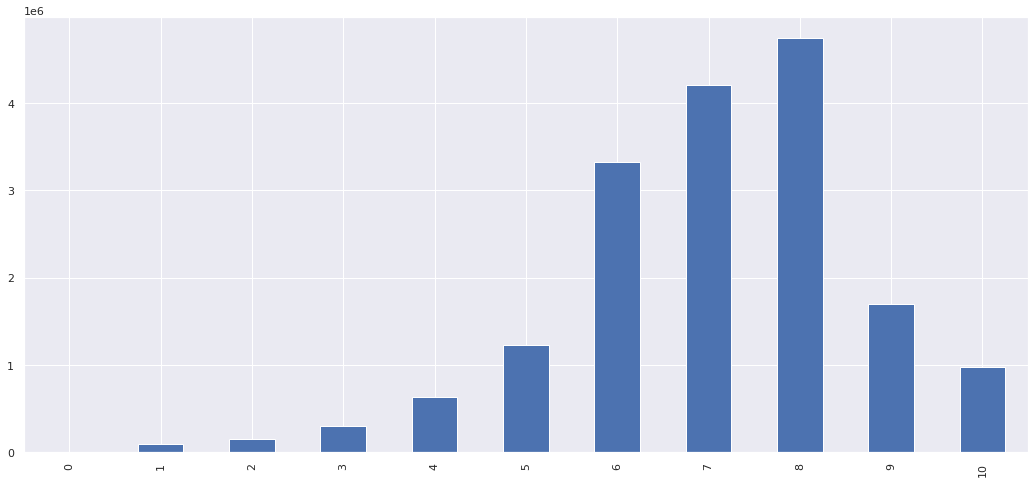

In [8]:
ratings_fixed.plot(kind='bar')

In [9]:
owned_games

bgg_user_owned
1.0    21879410
0.0    15761767
dtype: int64

In [10]:
wants_to_play

bgg_user_want_to_play
0.0    35449621
1.0     2191556
dtype: int64

In [51]:
play_counts

bgg_user_play_count
0             28692757
1              5182367
2              1959521
3              1088363
4               682740
                ...   
100000000            2
100000033            1
577836728            1
1000000000           1
2147483647           9
Length: 1499, dtype: int64

In [17]:
play_counts[1:].sum()

11507775

In [11]:
batch_size = 100000
n_iter = 0
with open('/home/adis/recommend.games/data/bgg_RatingItem.jl') as f:
    game_ratings = pd.DataFrame(dtype='int64')
    
    
    batch = pd.read_json(f, lines=True, nrows=batch_size)
    while(not batch.empty):
        batch_ratings = batch[['bgg_id', 'bgg_user_rating', 'bgg_user_owned']].groupby(by='bgg_id').agg('count')
        game_ratings = game_ratings.add(batch_ratings, fill_value=0).astype('int64')
        if(np.mod(n_iter, 20) == 0):
            print(n_iter)

        batch = pd.read_json(f, lines=True, nrows=batch_size)
        n_iter += 1

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400


In [60]:
(game_ratings['bgg_user_rating'] > 10000).sum()

318

In [61]:
(game_ratings['bgg_user_owned'] > 10000).sum()

695

In [20]:
batch.columns

Index(['bgg_id', 'bgg_user_for_trade', 'bgg_user_name', 'bgg_user_owned',
       'bgg_user_play_count', 'bgg_user_preordered', 'bgg_user_prev_owned',
       'bgg_user_rating', 'bgg_user_want_in_trade', 'bgg_user_want_to_buy',
       'bgg_user_want_to_play', 'item_id', 'updated_at', 'bgg_user_wishlist',
       'comment'],
      dtype='object')

In [23]:
batch_size = 100000
n_iter = 0
with open('/home/adis/recommend.games/data/bgg_RatingItem.jl') as f:
    user_ratings = pd.DataFrame(dtype='int64')
    batch = pd.read_json(f, lines=True, nrows=batch_size)
    while(not batch.empty):
        batch_ratings = batch[['bgg_user_name', 'bgg_user_rating', 'bgg_user_owned']].groupby(by='bgg_user_name').agg('count')
        user_ratings = user_ratings.add(batch_ratings, fill_value=0).astype('int64')
        if(np.mod(n_iter, 20) == 0):
            print(n_iter)

        batch = pd.read_json(f, lines=True, nrows=batch_size)
        n_iter += 1

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400


In [29]:
(user_ratings['bgg_user_rating'] > 10).sum()

199464

In [30]:
(user_ratings['bgg_user_owned'] > 10).sum()

262354